1.Import Necessary Libraries

In [166]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



2.Loud and Explore the Dataset

First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7

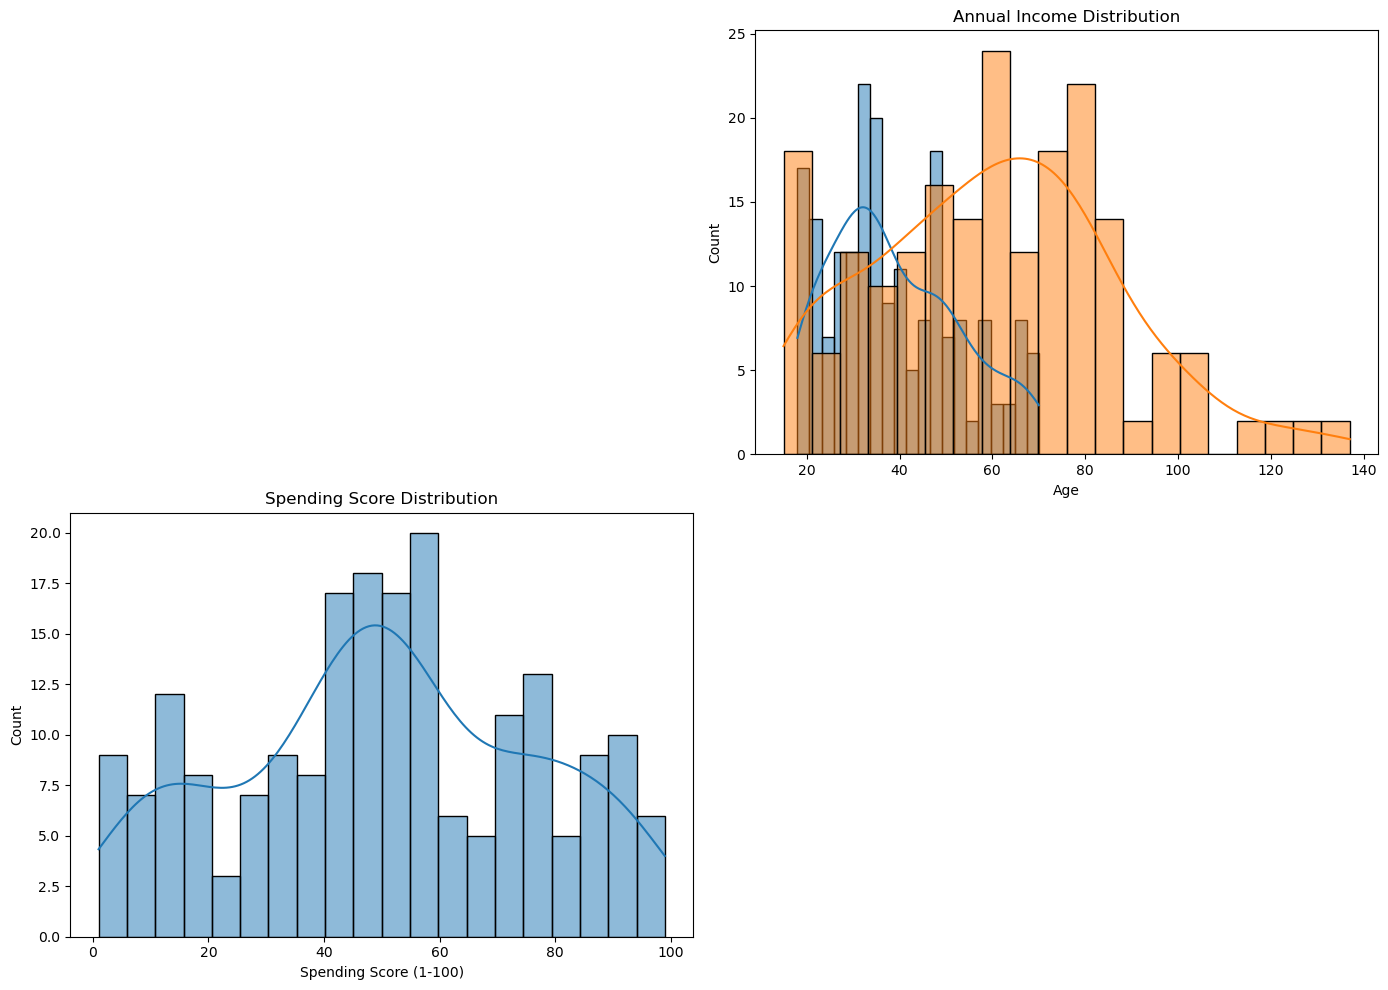

In [168]:
#loud the data
df =pd.read_csv('Mall_Customers.csv')

#display the first few row of the training data
print("First few rows of the dataset:")
print(df.head())

##Data types and sissing values
print("\nData types and missing values:")
print(df.info())
print(df.isnull().sum())

##Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Distribution of categorical features 
print("\nGender distribution:")
print(df ['Gender'].value_counts())
      
#Visualize distribution of numerical features
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 2)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df[ 'Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()


In [170]:
# Data Preprocessing

# Check for missing values
print(df.isnull().sum())

# Select relevant features for clustering, such as 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


3.Determine Optimal Number of Clusters

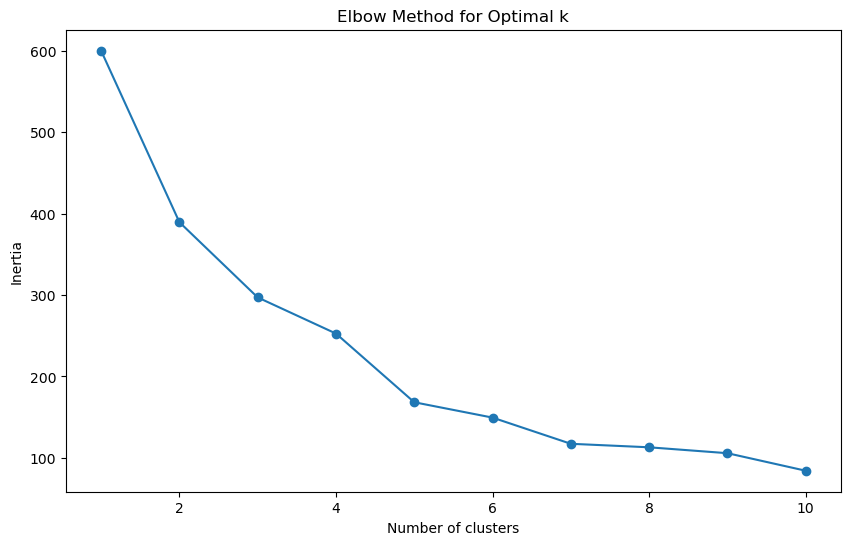

In [172]:

# Use the Elbow Method to find the optimal number of clusters 
inertia = []
K_range= range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0) 
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6)) 
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters') 
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

4.Perform K-Means Clustering

In [174]:
 # Fit K-means with the optimal number of clusters (e.g., 5 based on elbow method)
optimal_k = 5
kmeans = KMeans(n_clusters= optimal_k, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

#Add cluster labels to the original dataframe
df ['Cluster'] = clusters

# Display the first few rows with cluster Label's
print("First few rows with cluster labels:") 
print(df.head())

First few rows with cluster labels:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        4  
2        3  
3        4  
4        4  


5.Visualize Clusters

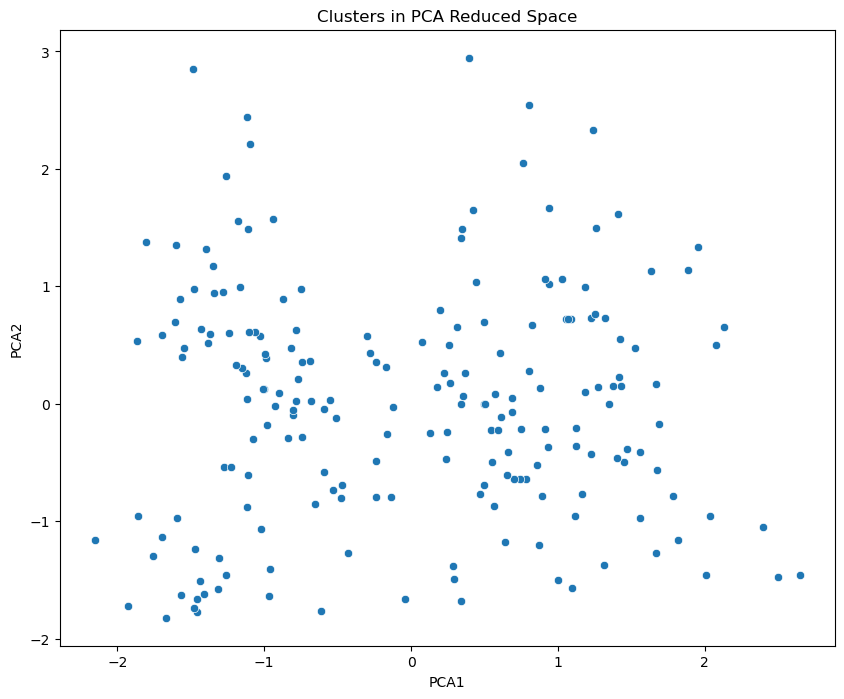

In [176]:
#Reduce dimensions to 20 for visualization
pca =PCA(n_components=2)
df_pca=pca.fit_transform(scaled_features)

#Create a DataFrame with PCA results and cluster Labels
df_pca= pd.DataFrame(df_pca, columns=['PCA1', 'PCA2']) 
df_pca[' Cluster'] = clusters

#Plot clusters in 20 space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', palette='viridis', data=df_pca, legend="full")
plt.title('Clusters in PCA Reduced Space')
plt.show()

6.Evaluate the Clustering

In [178]:
# Compute silhouette score
sil_score =silhouette_score(scaled_features, clusters) 
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.41664341513732767


7.Analyze Clusters


Average feature values by cluster:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         83.872340  55.638298           54.382979               48.851064
1        159.743590  39.871795           86.102564               19.358974
2        161.025000  32.875000           86.100000               81.525000
3         24.100000  46.250000           26.750000               18.350000
4         55.648148  25.185185           41.092593               62.240741


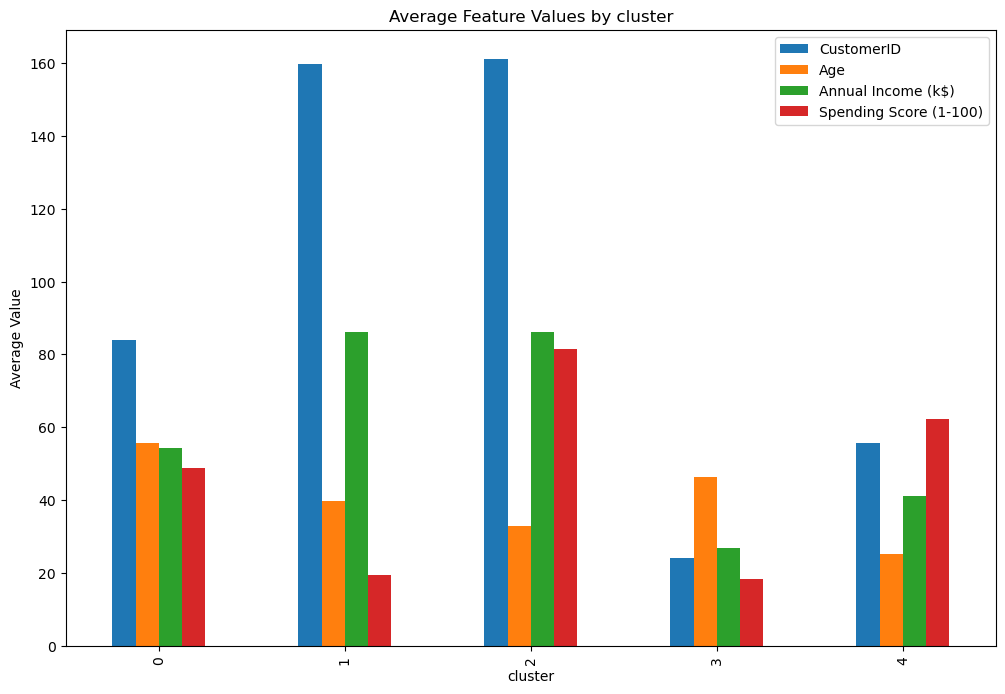

In [180]:
#Calculate the mean of each feature for each cluster
cluster_means =df.groupby('Cluster').mean(numeric_only=True) 
print("\nAverage feature values by cluster:")
print(cluster_means)

#Optional: Visualize the means for better understanding 
cluster_means.plot(kind='bar', figsize=(12, 8))
plt.title('Average Feature Values by cluster') 
plt.xlabel('cluster') 
plt.ylabel('Average Value')
plt.show()